## Importowanie pakietów

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
from collections import defaultdict
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

## Definicja sieci

In [18]:
# class KohonenNetwork:
#     def __init__(self, M, N, input_dim, initial_sigma=1.0, sigma_decay=1.0, init_lr=0.1, decay_rate=1, neighborhood_function='gaussian'):
#         # Initialization of the network with the given parameters and preparation of weights and cluster map.
#         self.M, self.N, self.input_dim = M, N, input_dim
#         self.initial_sigma, self.sigma_decay = initial_sigma, sigma_decay
#         self.init_lr, self.decay_rate = init_lr, decay_rate
#         self.neighborhood_function = neighborhood_function

#         # Initialize weights to form a rectangle with equal distances
#         x = np.linspace(0, 1, M)
#         y = np.linspace(0, 1, N)
#         xv, yv = np.meshgrid(x, y)
#         self.weights = np.dstack((xv, yv))

#         self.bmu_cluster_map = np.zeros((M, N), dtype=int)

#     def train(self, input_data, num_epochs):
#         # Proces uczenia sieci przez określoną liczbę epok.
#         for epoch in range(num_epochs):
#             sigma = self.initial_sigma * np.exp(-epoch / self.decay_rate) * self.sigma_decay
#             learning_rate = self.init_lr * np.exp(-epoch / self.decay_rate)
            
#             for data_sample in input_data:
#                 # Znajdź BMU i zaktualizuj wagi
#                 self._find_bmu_and_update_weights(data_sample, sigma, learning_rate)
        
#     def accuracy(self, data, labels):
#         correct = 0
#         total = len(data)
        
#         if total == 0:
#             return 0

#         for sample, label in zip(data, labels):
#             bmu = self._find_bmu_and_update_weights(sample, None, None)
#             if self.bmu_cluster_map[bmu] == label:
#                 correct += 1

#         return 100 * correct / total



#     def _neighborhood_function(self, distance, sigma):
#         # Funkcja sąsiedztwa, która oblicza wpływ odległości na aktualizację wag.
#         if self.neighborhood_function == 'gaussian':
#             return np.exp(-distance**2 / (2 * sigma**2))
#         elif self.neighborhood_function == 'mexican_hat':
#             return (1 - (distance**2 / sigma**2)) * np.exp(-distance**2 / (2 * sigma**2))
#         else:
#             raise ValueError(f"Nieznana funkcja sąsiedztwa: {self.neighborhood_function}")



#     def _find_bmu_and_update_weights(self, sample, sigma, lr):
#         # Znalezienie BMU, aktualizacja wag i zwrócenie BMU.
#         distances = np.linalg.norm(self.weights - sample, axis=2)
#         bmu = np.unravel_index(np.argmin(distances), distances.shape)
        
#         if sigma and lr:
#             x, y = np.ogrid[0:self.M, 0:self.N]
#             distance = np.sqrt((x - bmu[0])**2 + (y - bmu[1])**2)
#             influence = self._neighborhood_function(distance, sigma)
#             self.weights += lr * influence[..., np.newaxis] * (sample - self.weights)
        
#         return bmu

    
#     def assign_clusters(self, input_data):
#         # Mapowanie klastrów na podstawie danych wejściowych.
#         cluster_stats = defaultdict(list)

#         for i, data_sample in enumerate(input_data):
#             # Wyszukujemy BMU, przy czym nie aktualizujemy wag
#             best_matching_unit = self._find_bmu_and_update_weights(data_sample, None, None)
#             self.bmu_cluster_map[best_matching_unit] = i



#     def display_clustered_data(self, input_data, neuron_positions=True):
#         # Wizualizacja sklastrowanych danych wejściowych.
#         assigned_clusters = np.array([self.bmu_cluster_map[self._find_bmu_and_update_weights(sample, None, None)] for sample in input_data])
#         distinct_clusters = np.unique(assigned_clusters)
#         color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d' if input_data.shape[1] == 3 else None)

#         # Wyświetlanie danych wejściowych sklastrowanych
#         for i, cluster in enumerate(distinct_clusters):
#             cluster_mask = assigned_clusters == cluster
#             if input_data.shape[1] == 3:
#                 ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], input_data[cluster_mask, 2], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number
#             else:
#                 ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number

#         if neuron_positions:
#             # Dodanie pozycji neuronów
#             neuron_positions = np.array([self.weights[i, j, :] for i in range(self.M) for j in range(self.N)])
#             if input_data.shape[1] == 3:
#                 ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], neuron_positions[:, 2], color='red', edgecolors='k', s=100, marker='o', label='Neurony')
#             else:
#                 ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], color='red', edgecolors='k', s=100, marker='o', label='Neurony')

#         ax.set_title('3D Clustered Data' if input_data.shape[1] == 3 else '2D Clustered Data')
#         ax.set_xlabel('Dim 1')
#         ax.set_ylabel('Dim 2')
#         if input_data.shape[1] == 3:
#             ax.set_zlabel('Dim 3')
#         ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()

In [19]:
class KohonenNetwork:
    def __init__(self, M, N, input_dim, initial_sigma=1.0, sigma_decay=1.0, init_lr=0.1, decay_rate=1, neighborhood_function='gaussian'):
        # Initialization of the network with the given parameters and preparation of weights and cluster map.
        self.M, self.N, self.input_dim = M, N, input_dim
        self.initial_sigma, self.sigma_decay = initial_sigma, sigma_decay
        self.init_lr, self.decay_rate = init_lr, decay_rate
        self.neighborhood_function = neighborhood_function

        # Initialize weights to form a rectangle with equal distances
        x = np.linspace(0, 1, M)
        y = np.linspace(0, 1, N)
        xv, yv = np.meshgrid(x, y)
        self.weights = np.dstack((xv, yv))

        self.bmu_cluster_map = np.zeros((M, N), dtype=int)

    def train(self, input_data, num_epochs):
        # Proces uczenia sieci przez określoną liczbę epok.
        for epoch in range(num_epochs):
            sigma = self.initial_sigma * np.exp(-epoch / self.decay_rate) * self.sigma_decay
            learning_rate = self.init_lr * np.exp(-epoch / self.decay_rate)
            
            for data_sample in input_data:
                # Znajdź BMU i zaktualizuj wagi
                self._find_bmu_and_update_weights(data_sample, sigma, learning_rate)
        
    def accuracy(self, data, labels):
        correct = 0
        total = len(data)
        
        if total == 0:
            return 0

        for sample, label in zip(data, labels):
            bmu = self._find_bmu_and_update_weights(sample, None, None)
            if self.bmu_cluster_map[bmu] == label:
                correct += 1

        return 100 * correct / total



    def _neighborhood_function(self, distance, sigma):
        # Funkcja sąsiedztwa, która oblicza wpływ odległości na aktualizację wag.
        if self.neighborhood_function == 'gaussian':
            return np.exp(-distance**2 / (2 * sigma**2))
        elif self.neighborhood_function == 'mexican_hat':
            return (1 - (distance**2 / sigma**2)) * np.exp(-distance**2 / (2 * sigma**2))
        else:
            raise ValueError(f"Nieznana funkcja sąsiedztwa: {self.neighborhood_function}")



    def _find_bmu_and_update_weights(self, sample, sigma, lr):
        # Znalezienie BMU, aktualizacja wag i zwrócenie BMU.
        distances = np.linalg.norm(self.weights - sample, axis=2)
        bmu = np.unravel_index(np.argmin(distances), distances.shape)
        
        if sigma and lr:
            x, y = np.ogrid[0:self.M, 0:self.N]
            distance = np.sqrt((x - bmu[0])**2 + (y - bmu[1])**2)
            influence = self._neighborhood_function(distance, sigma)
            self.weights += lr * influence[..., np.newaxis] * (sample - self.weights)
        
        return bmu

    
    def assign_clusters(self, input_data):
        # Mapowanie klastrów na podstawie danych wejściowych.
        cluster_stats = defaultdict(list)

        for i, data_sample in enumerate(input_data):
            # Wyszukujemy BMU, przy czym nie aktualizujemy wag
            best_matching_unit = self._find_bmu_and_update_weights(data_sample, None, None)
            self.bmu_cluster_map[best_matching_unit] = i



    def display_clustered_data(self, input_data, neuron_positions=True, view_data=True):
        # Wizualizacja sklastrowanych danych wejściowych.
        assigned_clusters = np.array([self.bmu_cluster_map[self._find_bmu_and_update_weights(sample, None, None)] for sample in input_data])
        distinct_clusters = np.unique(assigned_clusters)
        color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d' if input_data.shape[1] == 3 else None)
        if view_data:
            # Wyświetlanie danych wejściowych sklastrowanych
            for i, cluster in enumerate(distinct_clusters):
                cluster_mask = assigned_clusters == cluster
                if input_data.shape[1] == 3:
                    ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], input_data[cluster_mask, 2], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number
                else:
                    ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number

        if neuron_positions:
            # Dodanie pozycji neuronów
            neuron_positions = np.array([self.weights[i, j, :] for i in range(self.M) for j in range(self.N)])
            if input_data.shape[1] == 3:
                ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], neuron_positions[:, 2], color='red', edgecolors='k', s=100, marker='o', label='Neurony')
            else:
                ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], color='red', edgecolors='k', s=100, marker='o', label='Neurony')

        ax.set_title('3D Clustered Data' if input_data.shape[1] == 3 else '2D Clustered Data')
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        if input_data.shape[1] == 3:
            ax.set_zlabel('Dim 3')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

## Załadowanie i wizualizacja danych

In [20]:
hexagon = pd.read_csv('../data/hexagon.csv').values
cube = pd.read_csv('../data/cube.csv').values

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2747419779.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_colors))


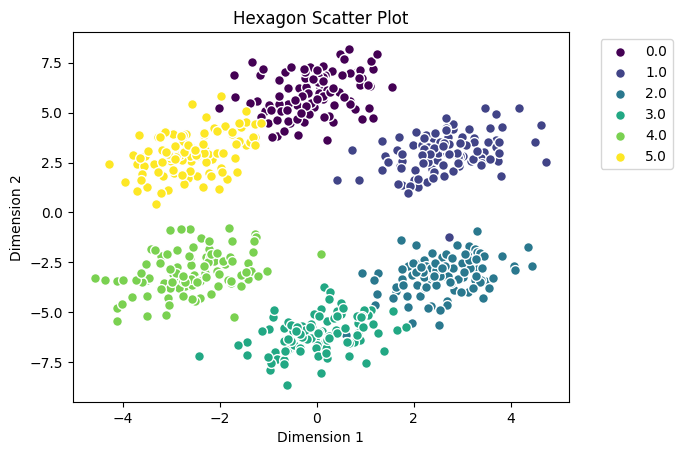

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
unique_colors = np.unique(hexagon[:, 2])
colors = plt.cm.get_cmap('viridis', len(unique_colors))

for i, color in enumerate(unique_colors):
    mask = hexagon[:, 2] == color
    ax.scatter(hexagon[mask, 0], hexagon[mask, 1], color=colors(i), edgecolors='w', s=50, label=f'{color}')

ax.set_title('Hexagon Scatter Plot')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
data_hex = pd.read_csv('../data/hexagon.csv').values[:, :2]
data_cube = pd.read_csv('../data/cube.csv').values[:, :3]

In [23]:
labels_hex = pd.read_csv('../data/hexagon.csv').values[:, -1]
labels_cube = pd.read_csv('../data/cube.csv').values[:, -1]

## Unikalne klasy w danych

In [24]:
unique_labels = np.unique(labels_hex)
print(unique_labels)


[0. 1. 2. 3. 4. 5.]


In [1]:
# # Define the range of parameters for the grid search
# sigma_values = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
# learning_rates = [0.05, 0.1, 0.2, 0.3, 0.5, 1]
# decay_rates = [0.1, 0.5, 0.99, 1]
# sigma_decays = [0.95, 0.99, 1]  # Adjusting how quickly the neighborhood function shrinks

# # Initialize variables to store the best score and corresponding parameters
# best_v_score = 0
# best_params = {}

# # Assume 'data_cube' and 'labels_cube' are already defined as your data and true labels
# for sigma in sigma_values:
#     for lr in learning_rates:
#         for decay in decay_rates:
#             for sigma_decay in sigma_decays:
#                 # Create a new Kohonen network instance with the current set of parameters
#                 network = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=sigma, sigma_decay=sigma_decay, init_lr=lr, decay_rate=decay, neighborhood_function='mexican_hat')
                
#                 # Train the network
#                 network.train(data_hex, 50)
                
#                 # Assign clusters based on the trained network
#                 network.assign_clusters(data_hex)
                
#                 # Calculate predicted labels
#                 predicted_labels = np.array([
#                     network.bmu_cluster_map[network._find_bmu_and_update_weights(sample, None, None)]
#                     for sample in data_hex
#                 ])
                
#                 # Calculate the V-score for the current configuration
#                 v_measure = v_measure_score(labels_hex, predicted_labels)
                
#                 # Print the current results (optional, for tracking progress)
#                 print(f"Sigma: {sigma}, LR: {lr}, Decay: {decay}, Sigma Decay: {sigma_decay}, V-score: {v_measure}")
                
#                 # Check if the current V-score is the best one, and if so, update the best parameters
#                 if v_measure > best_v_score:
#                     best_v_score = v_measure
#                     best_params = {'sigma': sigma, 'lr': lr, 'decay': decay, 'sigma_decay': sigma_decay}

# # Print the best parameters and corresponding V-score after the grid search completes
# print("Best V-score:", best_v_score)
# print("Best parameters:", best_params)


## Testowanie sieci z gaussowską funkcją sąsiedztwa 

### Modyfikowanie parametrem sigma

In [ ]:
# Best parameters: {'sigma': 0.1, 'lr': 0.05, 'decay': 0.99, 'sigma_decay': 0.95}

In [126]:
network_a = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [37]:
network_a.train(data_hex, num_epochs=50)

In [38]:
network_a.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


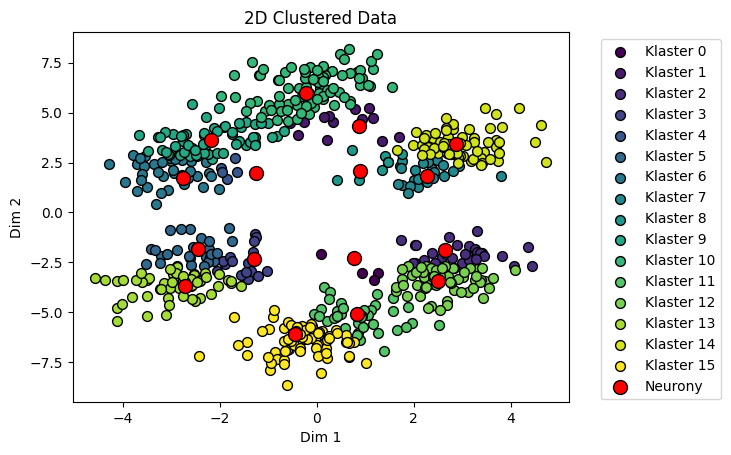

In [39]:
network_a.display_clustered_data(data_hex, view_data=True)
# network_a = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.7782870758349548

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


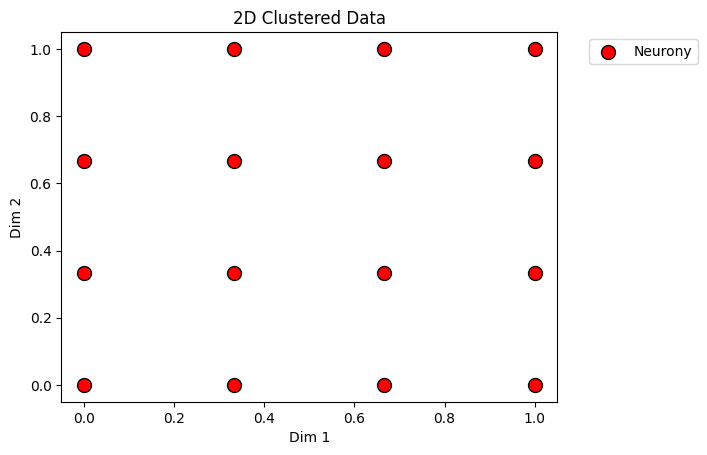

In [127]:
network_a.display_clustered_data(data_hex, view_data=False)
# network_a = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.7782870758349548

In [40]:
predicted_labels = np.array([network_a.bmu_cluster_map[network_a._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [41]:
v_measure_a = v_measure_score(labels_hex, predicted_labels)

In [42]:
v_measure_a

0.7782870758349548

In [43]:
network_b = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.5, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [44]:
network_b.train(data_hex, 100)

In [45]:
network_b.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


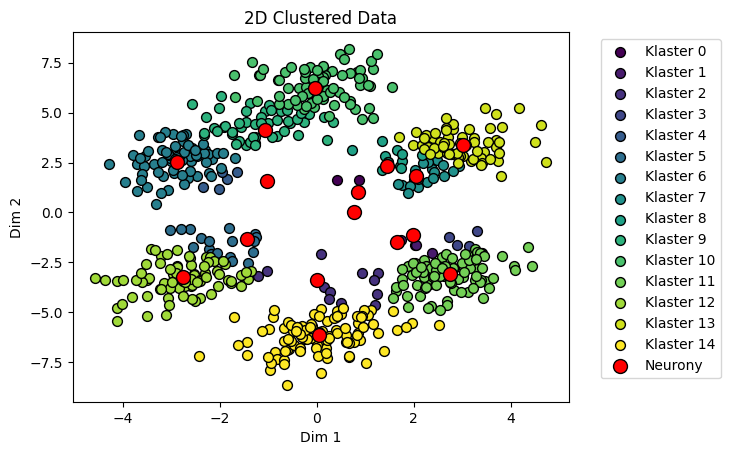

In [46]:
network_b.display_clustered_data(data_hex)
# network_b = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.5, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.8200981572522829

In [47]:
predicted_labels = np.array([network_b.bmu_cluster_map[network_b._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [48]:
v_measure_b = v_measure_score(labels_hex, predicted_labels)

In [49]:
v_measure_b

0.8200981572522829

In [50]:
network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [51]:
network_c.train(data_hex, 10)

In [52]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


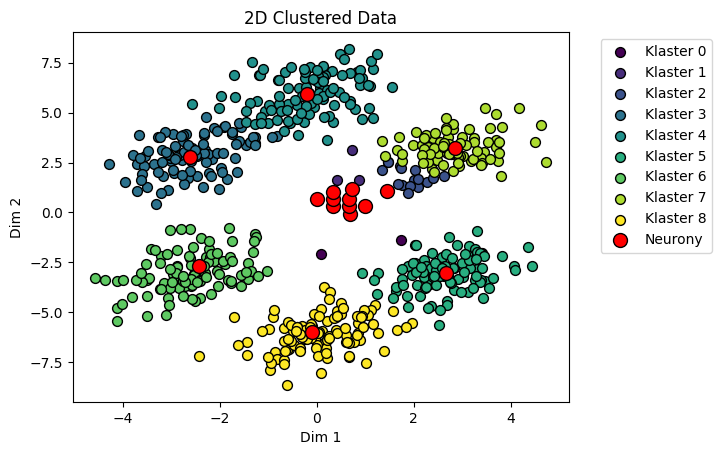

In [53]:
network_c.display_clustered_data(data_hex)
# network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.9170461300759121

In [54]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [55]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [56]:
v_measure_c

0.9170461300759121

### Sprawdzenie dla małego iloczynu MxN

In [64]:
network2 = KohonenNetwork(M=2, N=2, input_dim=2, initial_sigma=1.0, sigma_decay=0.1, init_lr=2, decay_rate=100)


In [65]:
network2.train(data_hex,  10)

In [66]:
network2.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


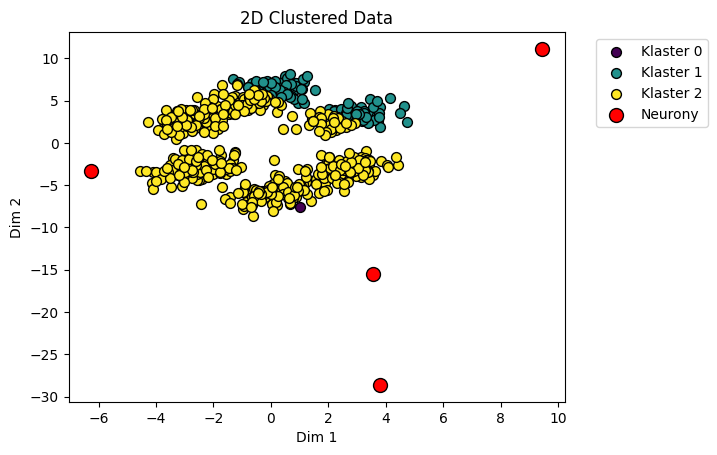

In [67]:
network2.display_clustered_data(data_hex)

In [68]:
predicted_labels = np.array([network2.bmu_cluster_map[network2._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [69]:
v_measure_2 = v_measure_score(labels_hex, predicted_labels)

In [70]:
v_measure_2

0.23969726824077914

## Testowanie sieci z funkcją sąsiedztwa minus druga pochodną funkcji gaussowskiej

### Modyfikowanie parametrem sigma

In [ ]:
# Best parameters: {'sigma': 0.1, 'lr': 0.05, 'decay': 0.99, 'sigma_decay': 0.95}

In [72]:
network_a = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=1, sigma_decay=0.95, init_lr=0.05, decay_rate=0.99, neighborhood_function='mexican_hat')

In [73]:
network_a.train(data_hex, 10)

In [74]:
network_a.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


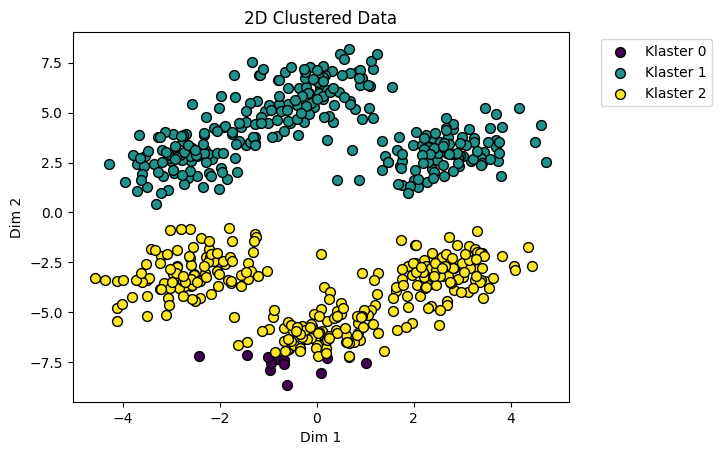

In [75]:
network_a.display_clustered_data(data_hex, neuron_positions=False)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


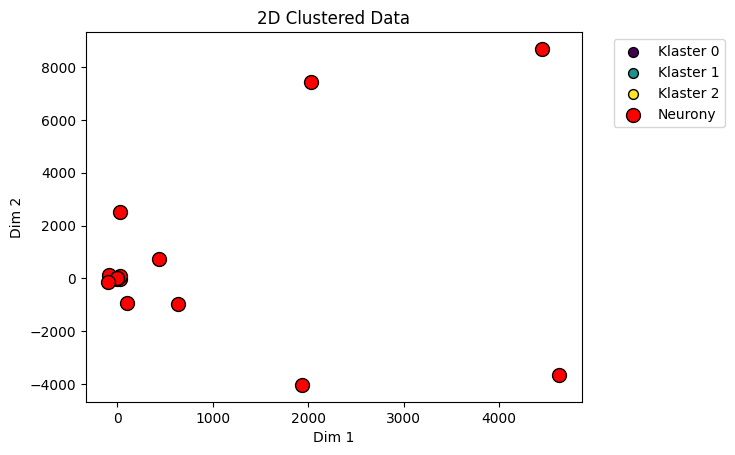

In [76]:
network_a.display_clustered_data(data_hex)

In [77]:
predicted_labels = np.array([network_a.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [78]:
v_measure_a = v_measure_score(labels_hex, predicted_labels)

In [79]:
v_measure_a

0.39977140005175904

In [80]:
network_b = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.5, sigma_decay=0.95, init_lr=0.05, decay_rate=0.99, neighborhood_function='mexican_hat')

In [81]:
network_b.train(data_hex, 10)

In [82]:
network_b.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


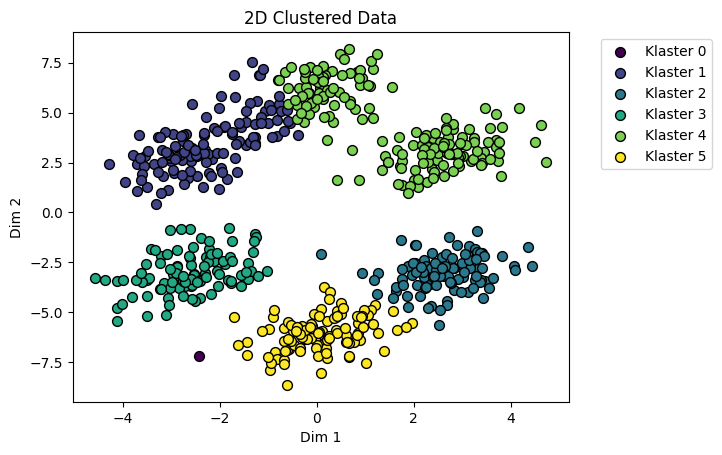

In [83]:
network_b.display_clustered_data(data_hex, neuron_positions=False)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


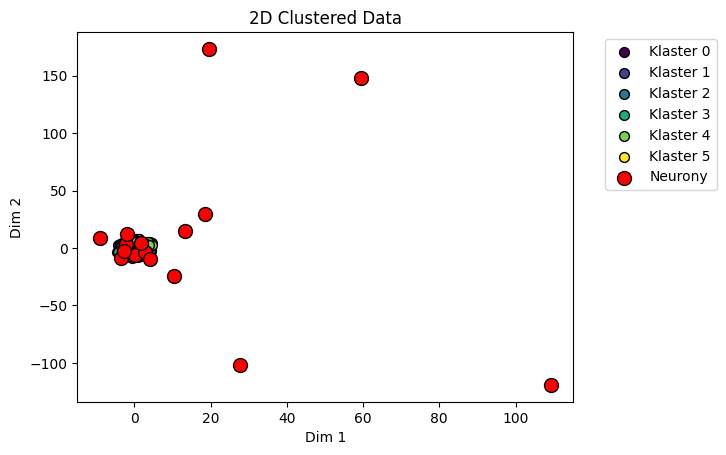

In [84]:
network_b.display_clustered_data(data_hex, neuron_positions=True)

In [85]:
predicted_labels = np.array([network_b.bmu_cluster_map[network_b._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [86]:
v_measure_b = v_measure_score(labels_hex, predicted_labels)

In [87]:
v_measure_b

0.8494360575722517

In [88]:
network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=0.95, init_lr=0.05, decay_rate=0.99, neighborhood_function='mexican_hat')

In [89]:
network_c.train(data_hex, 10)

In [90]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


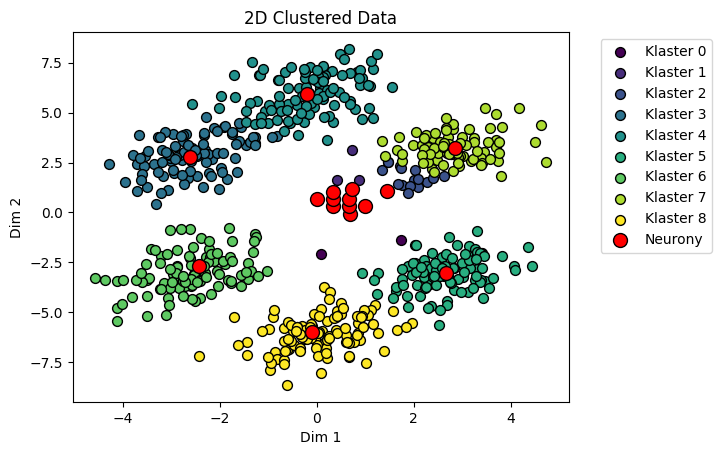

In [91]:
network_c.display_clustered_data(data_hex)

In [92]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [93]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [94]:
v_measure_c

0.9170461300759121

### Sprawdzenie dla małego iloczynu MxN

In [95]:
network_a = KohonenNetwork(M=2, N=2, input_dim=2, initial_sigma=0.1, sigma_decay=0.95, init_lr=0.05, decay_rate=0.99, neighborhood_function='mexican_hat')

In [96]:
network2.train(data_hex, 10)

In [97]:
network2.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


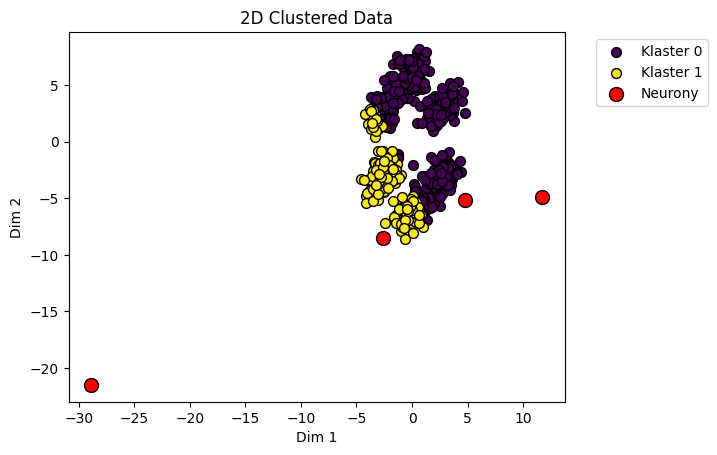

In [98]:
network2.display_clustered_data(data_hex)

In [99]:
predicted_labels = np.array([network2.bmu_cluster_map[network2._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [100]:
v_measure_2 = v_measure_score(labels_hex, predicted_labels)

In [101]:
v_measure_2

0.3432974664189891

In [105]:
network_c = KohonenNetwork(M=2, N=2, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [106]:
network_c.train(data_hex, 10)

In [107]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


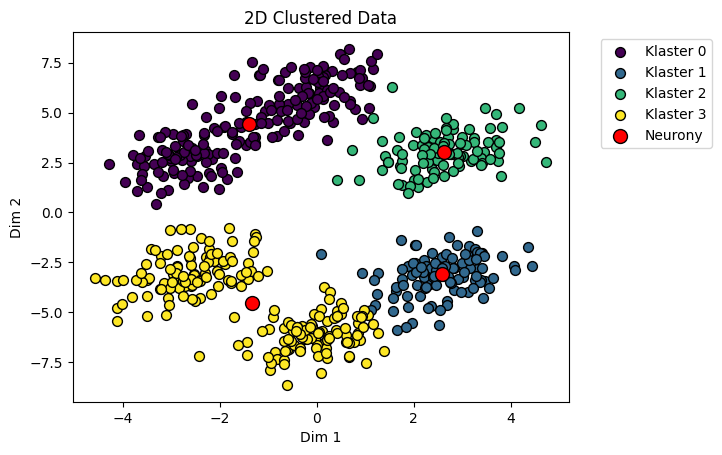

In [108]:
network_c.display_clustered_data(data_hex)
# network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.8081471327626951


In [109]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [110]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [111]:
v_measure_c

0.8081471327626951

In [112]:
network_c = KohonenNetwork(M=3, N=3, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [113]:
network_c.train(data_hex, 10)

In [114]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


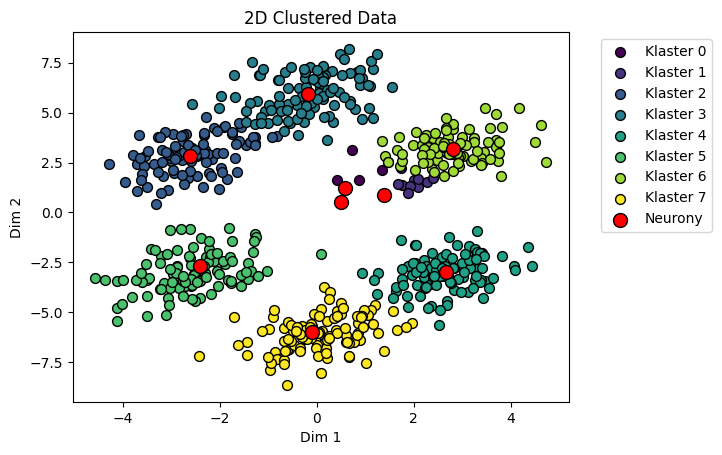

In [115]:
network_c.display_clustered_data(data_hex)
# network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.9257059981958378

In [116]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [117]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [118]:
v_measure_c

0.9257059981958378

In [119]:
network_c = KohonenNetwork(M=5, N=5, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

In [120]:
network_c.train(data_hex, 10)

In [121]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_31181/2153362130.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


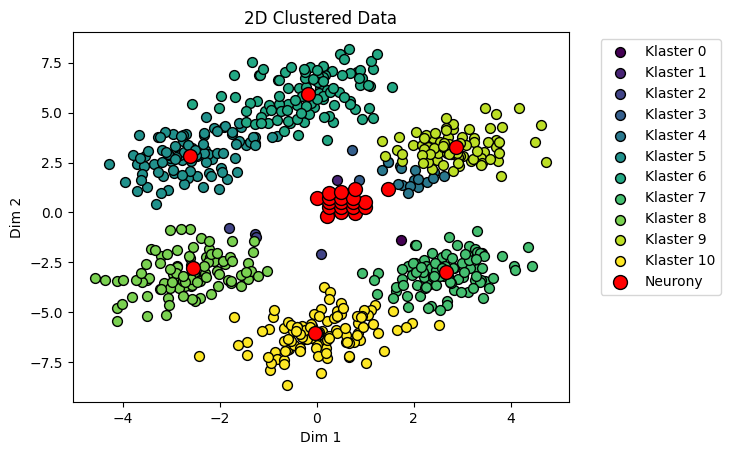

In [122]:
network_c.display_clustered_data(data_hex)
# network_c = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.05, decay_rate=0.99)

# 0.9086981261563742

In [123]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [124]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [125]:
v_measure_c

0.9086981261563742